In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from mpl_toolkits.mplot3d import axes3d
from random import sample 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
data = pd.read_csv('vigna1.csv')

In [74]:
data.shape

(27576, 132)

In [75]:
data = data.drop(columns = ['Unnamed: 0'])

Text(0, 0.5, 'FREQUENCY')

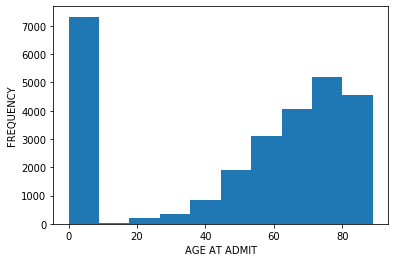

In [76]:
plt.hist(data['Age_Admit'])
plt.xlabel('AGE AT ADMIT')
plt.ylabel('FREQUENCY')

Text(0, 0.5, 'FREQUENCY')

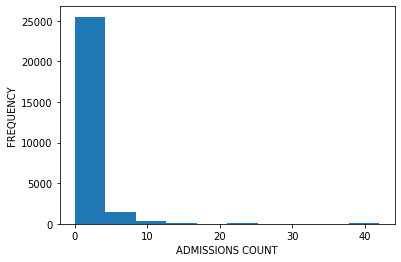

In [77]:
plt.hist(data['ADMISSIONS_CNT'])
plt.xlabel('ADMISSIONS COUNT')
plt.ylabel('FREQUENCY')

In [78]:
pts = data.iloc[:,0].unique()
trp, tsp = train_test_split(pts, train_size=0.8)
train = data[data.iloc[:,0].isin(trp)]
test = data[data.iloc[:,0].isin(tsp)]

In [79]:
Y_train = train['HEART_DEATH']
X_train = train.drop(columns = ['HEART_DEATH'])
Y_test = test['HEART_DEATH']
X_test = test.drop(columns = ['HEART_DEATH'])

In [80]:
model3 = DecisionTreeClassifier()
model3.fit(X_train,Y_train)
y_pred_knn = model3.predict(X_test)

print(classification_report(Y_test,y_pred_knn))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3985
         1.0       0.06      0.06      0.06        79

    accuracy                           0.96      4064
   macro avg       0.52      0.52      0.52      4064
weighted avg       0.96      0.96      0.96      4064

Accuracy of the model
0.9611220472440944


In [81]:
fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,y_pred_knn)
auc(fpr_dt,tpr_dt)

0.521106046408208

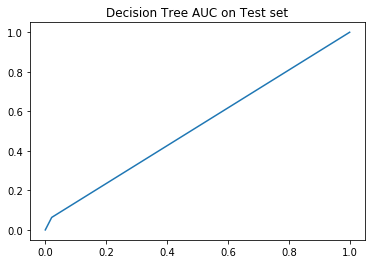

In [108]:
plt.title('Decision Tree AUC on Test set')
plt.plot(fpr_dt,tpr_dt)

In [83]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
probs = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)
temp = auc(fpr,tpr)
print(temp)

0.882095834061274


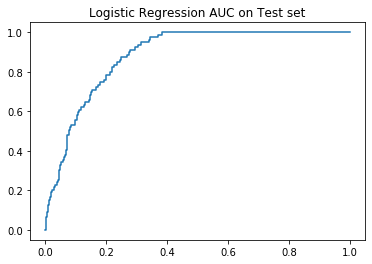

In [107]:
plt.title('Logistic Regression AUC on Test set')
plt.plot(fpr,tpr)

In [86]:
#Check for overfitting
lr = LogisticRegression()
lr.fit(X_train, Y_train)
probs = lr.predict_proba(X_train)[:,1]
fpr1, tpr1, thresholds = roc_curve(Y_train, probs)
temp = auc(fpr1,tpr1)
print(temp)

0.9343640429803773


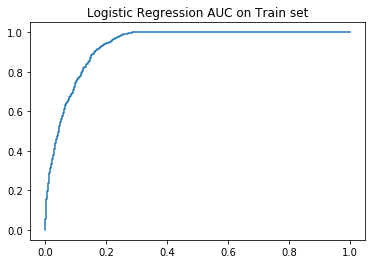

In [106]:
plt.title('Logistic Regression AUC on Train set')
plt.plot(fpr1,tpr1)

In [88]:
rf = RandomForestClassifier(n_estimators=100)

In [89]:
rf.fit(X_train,Y_train)
rf_probs = rf.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_probs)
auc(rf_fpr, rf_tpr)

0.612983815891873

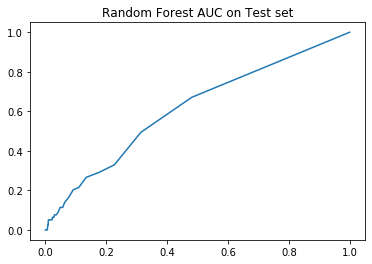

In [105]:
plt.title('Random Forest AUC on Test set')
plt.plot(rf_fpr,rf_tpr)

In [91]:
#Check for overfitting
rf.fit(X_train,Y_train)
rf_probs = rf.predict_proba(X_train)[:,1]
rf_fpr1, rf_tpr1, rf_thresholds = roc_curve(Y_train, rf_probs)
auc(rf_fpr1, rf_tpr1)

1.0

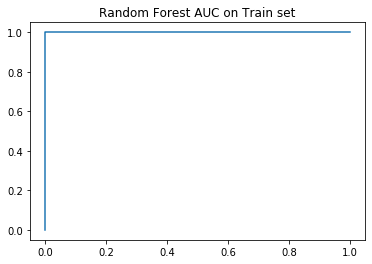

In [104]:
plt.title('Random Forest AUC on Train set')
plt.plot(rf_fpr1,rf_tpr1)

Text(0.5, 1.0, 'Comparing AUC of Models')

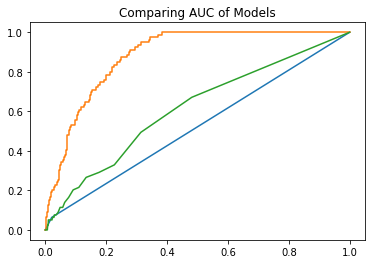

In [96]:
plt.plot(fpr_dt,tpr_dt)#Decision Tree
plt.plot(fpr,tpr)#Logistic Regression
plt.plot(rf_fpr,rf_tpr)#Random forest
plt.title("Comparing AUC of Models")


In [21]:
imp = pd.DataFrame()
imp['cls'] = X_train.columns
imp['importance'] = rf.feature_importances_

In [24]:
rval = []
number = []
for i in range(1,imp.shape[0],2):
    c = imp[:i]['cls'].tolist()
    print(c)
    rf = RandomForestClassifier()
    rf.fit(X_train[c],Y_train)
    probs = rf.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    ac=auc(fpr,tpr)
    print(ac)
    rval.append(ac)
    number.append(i)

['Age_Admit']
0.48759969590158275
['Age_Admit', 'Age_Death', 'ADMISSIONS_CNT']
0.5480129932960122
['Age_Admit', 'Age_Death', 'ADMISSIONS_CNT', 'ATHERO_DIAGNOSIS_FLAG', 'GENDER_F']
0.5985195936139333
['Age_Admit', 'Age_Death', 'ADMISSIONS_CNT', 'ATHERO_DIAGNOSIS_FLAG', 'GENDER_F', 'GENDER_M', 'ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE']
0.5861911673232427
['Age_Admit', 'Age_Death', 'ADMISSIONS_CNT', 'ATHERO_DIAGNOSIS_FLAG', 'GENDER_F', 'GENDER_M', 'ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE', 'ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'ETHNICITY_ASIAN']
0.584485451655263
['Age_Admit', 'Age_Death', 'ADMISSIONS_CNT', 'ATHERO_DIAGNOSIS_FLAG', 'GENDER_F', 'GENDER_M', 'ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE', 'ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'ETHNICITY_ASIAN', 'ETHNICITY_ASIAN - ASIAN INDIAN', 'ETHNICITY_ASIAN - CAMBODIAN']
0.5767143548275624
['Age_Admit', 'Age_Death', 'ADMISSIONS_CNT', 'ATHERO_DIAGNOSIS_FLAG', 'GENDER_F', 'GENDER_M

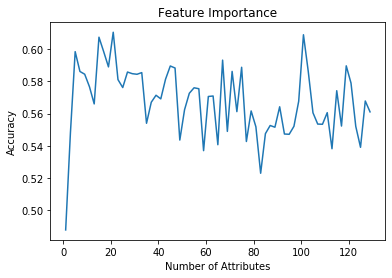

In [103]:
plt.title('Feature Importance')
plt.xlabel('Number of Attributes')
plt.ylabel('Accuracy')
plt.plot(range(1,imp.shape[0],2),rval)

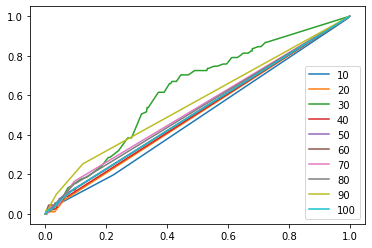

In [30]:
import random
a = []
c = list(X_train.columns)
num = [10,20,30,40,50,60,70,80,90,100,110] 
for i in range(1,11,1):
    list1 = random.sample(c, num[(i-1)])
    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train[list1],Y_train)
    probs = rf.predict_proba(X_test[list1])[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    ac = auc(fpr,tpr)
    a.append(a)
    plt.plot(fpr,tpr,label = num[(i-1)])
    plt.legend()


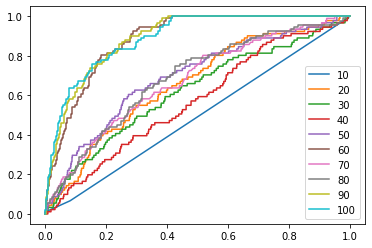

In [31]:
import random
a = []
c = list(X_train.columns)
num = [10,20,30,40,50,60,70,80,90,100,110] 
for i in range(1,11,1):
    list1 = random.sample(c, num[(i-1)])
    # Random Forest
    rf = LogisticRegression()
    rf.fit(X_train[list1],Y_train)
    probs = rf.predict_proba(X_test[list1])[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    ac = auc(fpr,tpr)
    a.append(a)
    plt.plot(fpr,tpr,label = num[(i-1)])
    plt.legend()


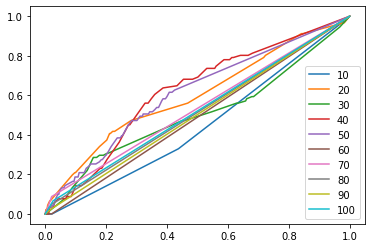

In [35]:

import random
a = []
c = list(X_train.columns)
num = [10,20,30,40,50,60,70,80,90,100,110] 
for i in range(1,11,1):
    list1 = random.sample(c, num[(i-1)])
    # Random Forest
    rf = DecisionTreeClassifier()
    rf.fit(X_train[list1],Y_train)
    probs = rf.predict_proba(X_test[list1])[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    ac = auc(fpr,tpr)
    a.append(a)
    plt.plot(fpr,tpr,label = num[(i-1)])
    plt.legend()

In [47]:
num = [20,40,60,80,100] 
size = [5000,10000,15000,20000,25000,30000]
num1 = []
size1 = []
randomForest1 = []
count = 0
for i in range(0,5,1):
  list1 = random.sample(c,num[(i-1)])
  for j in range(0,6,1):
    # Random Forest
    sz = size[j]
    rf = RandomForestClassifier(n_estimators = 100)
    rf.fit(X_train[list1],Y_train)
    probs = rf.predict_proba(X_test[list1])[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    a = auc(fpr,tpr)
    randomForest1.append(a)
    num1.append(num[i])
    size1.append(size[j])
    count = count+1

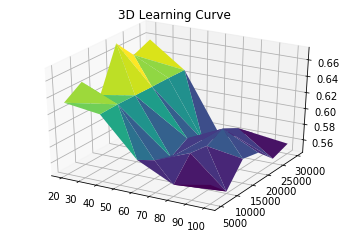

In [101]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(num1,size1,randomForest1,cmap = plt.cm.viridis,linewidth = 0.2)
plt.title('3D Learning Curve')
plt.show() 